In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/Real-estate1.csv')
df = df.drop('No', axis=1)

In [ ]:
df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

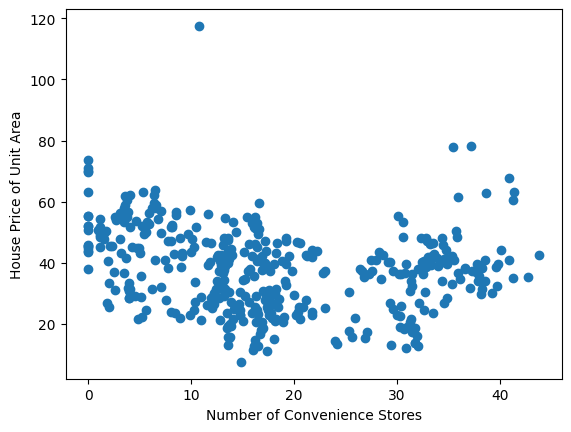

In [ ]:
plt.scatter(df['X2 house age'], df['Y house price of unit area'])
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.show()

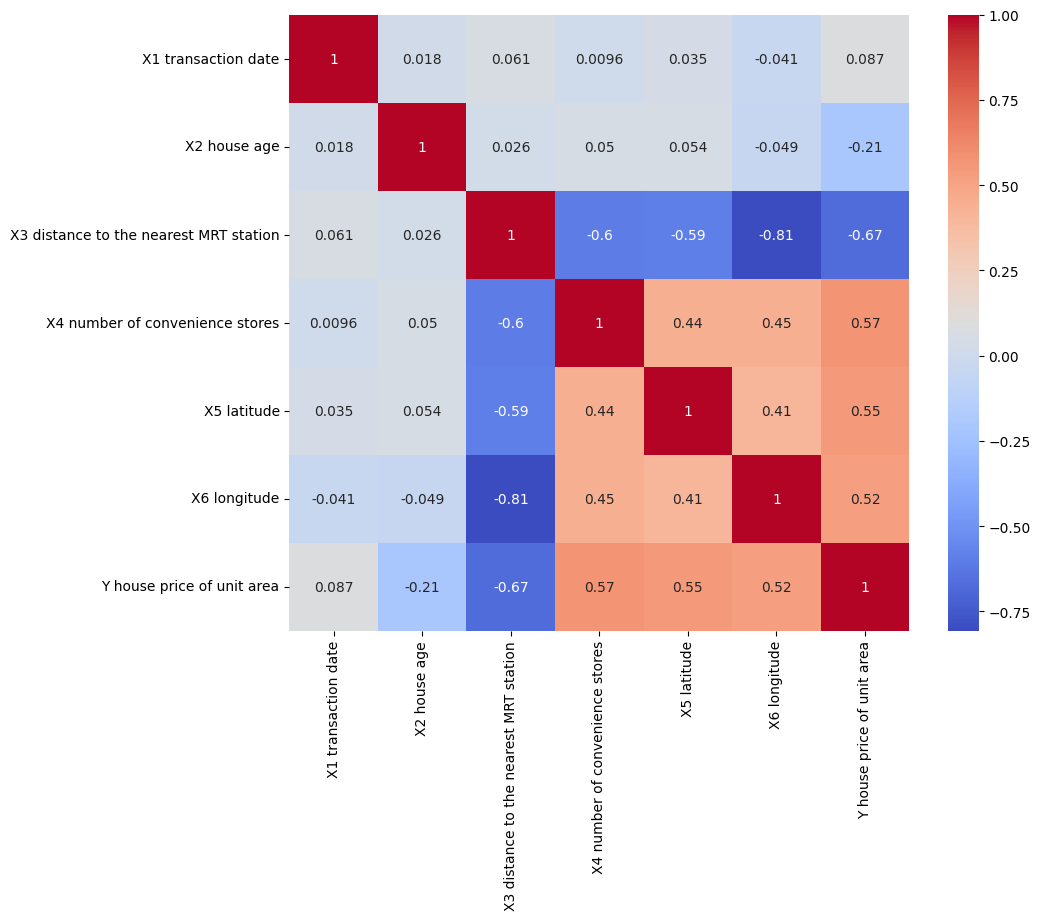

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y = df['Y house price of unit area']

In [ ]:
print(X)
print(y)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  
0                                 10  
1                                  9  
2                                  5  
3                                  5  
4                                  5  
..                               

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 2

In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
Prediction= lm.predict(X_test)

In [ ]:
from re import M
MSE = mean_squared_error(y_test, lm.predict(X_test))
r2 = r2_score(y_test, lm.predict(X_test))

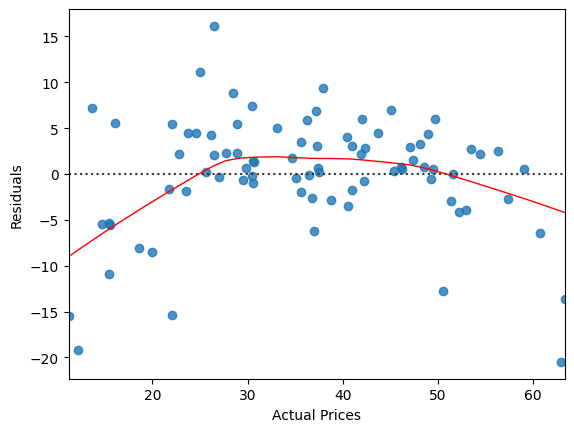

In [ ]:
sns.residplot(x=y_test, y=Prediction, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()